<a href="https://colab.research.google.com/github/NVinhTran0340/Programming-Project-Submission/blob/main/Furniture_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [5]:
!ls
# Edwin U3272732

 DataForML.pkl	      'Furniture Price  Prediction.ipynb'   Untitled0.ipynb
 Final_XGB_Model.pkl   ST1.ipynb


## Step 1：Reading the data

In [6]:
# Reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
furnituredata = pd.read_csv('/content/drive/MyDrive/ST1/Furniture Price Prediction(NEW).csv', encoding='latin-1') # Try 'latin-1' encoding
# If 'latin-1' doesn't work, try other encodings like 'ISO-8859-1', 'utf-16', etc.
print('Shape before deleting duplicate values:', furnituredata.shape)
# Removing duplicate rows if any
furnituredata = furnituredata.drop_duplicates()
print('Shape After deleting duplicate values:', furnituredata.shape)

#printing sample data
#start observing the furniture	/type	/url	/rate	/delivery	/sale	/price
furnituredata.head(10)

Shape before deleting duplicate values: (196, 6)
Shape After deleting duplicate values: (154, 6)


,furniture,type,url,rate,delivery,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,2500
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,1200
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,1099
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,1200
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,1400
5,Modern Home Modern Tv Table - Black Oak,Modern Home Modern Tv Table Black Oak,https://www.jumia.com.eg//ar/modern-tv-table-b...,4.3,172.14,2000
6,Modern desk with side shelves,Modern Home,https://www.jumia.com.eg//ar/modern-home-offic...,4.1,52.44,2000
7,Modern TV table,Modern Home,https://www.jumia.com.eg//ar/modern-home-moder...,4.0,172.14,2000
8,Side table with removable tray,Modern Home,https://www.jumia.com.eg//ar/generic-side-tabl...,0.0,172.14,900
9,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,1099


## Key observation about Data Description
* FURNITURE - Descriptive name of the furniture item.
* TYPE - Category or style of the furniture (e.g., "Home Decor Center," "Modern Home").
* URL - Web address linking to the product page for the furniture item.
* RATE - Average customer rating for the furniture, likely on a scale from 0 to 5.
* DELIVERY - Cost of delivery for the furniture item, possibly in the local currency.
* SALE - Discount percentage applied to the original price of the furniture.
* PRICE - Sale price of the furniture after any discounts, possibly in a fixed format that requires cleaning for analysis.

## Step 2: Problem Statement Dentition
Target Variable: PRICE

The target variable is the final sale price of the furniture items after discounts, as indicated in the dataset.

Predictors/Features: The potential features that could be used to predict the PRICE include:

* RATE
* DELIVERY
* SALE
* FURNITURE
* TYPE

## Step 3 Choosing the appropriate ML/AI Algorithm for Data Analysis.
Based on the problem statement we need to create a supervised ML Regression model, as the target variable is Continuous.

array([[<Axes: title={'center': 'rate'}>,
        <Axes: title={'center': 'delivery'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

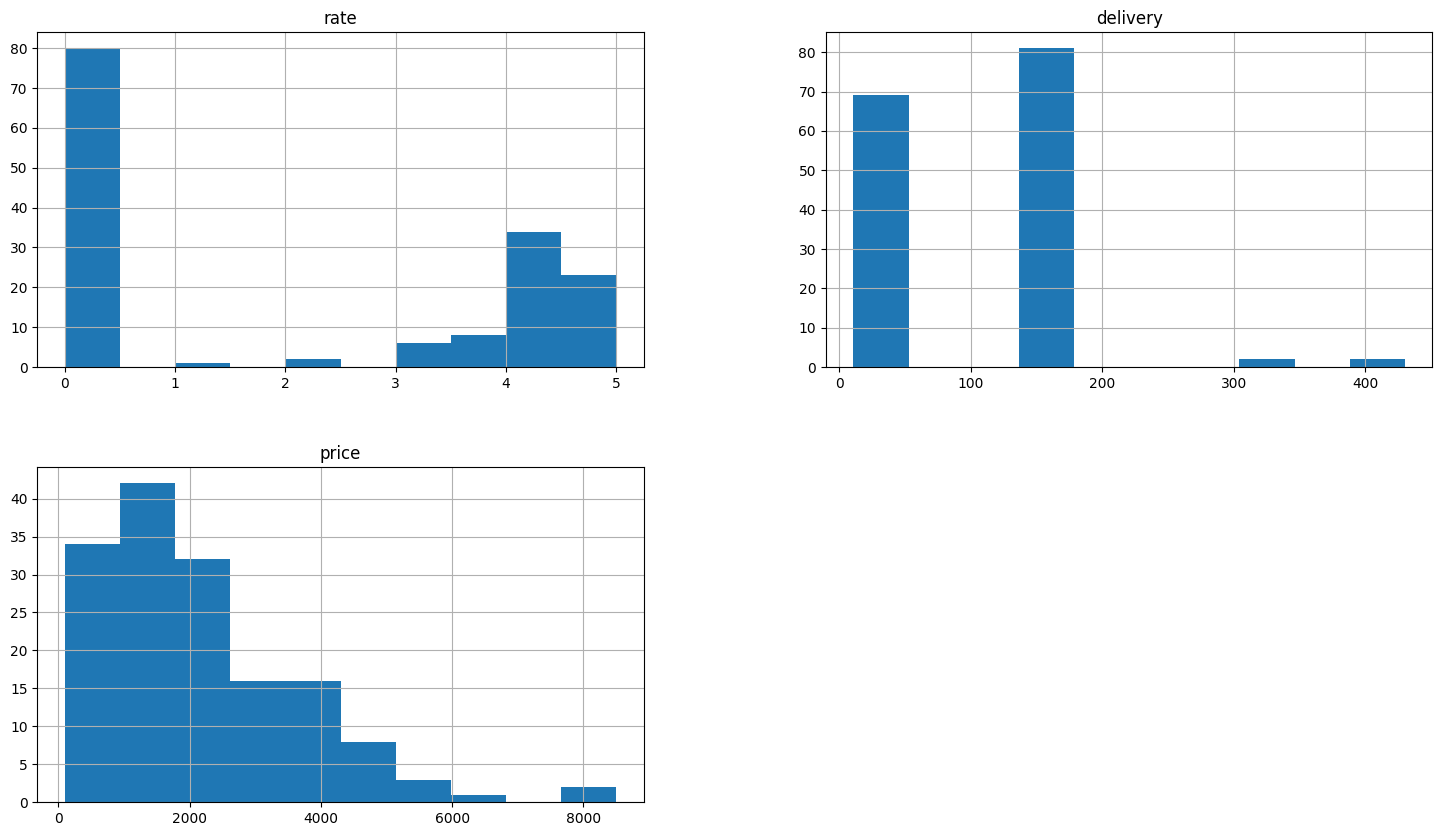

In [7]:
%matplotlib inline
# Plotting histogram for each column
furnituredata.hist(['furniture', 'type', 'rate', 'delivery', 'price' ], figsize=(18,10))

## Step 5 Basic Exploratory Data Analysis

This step is performed to assess the furniture dataset comprehensively. It involves evaluating the volume of data and the types of columns present, which is crucial for initial data exploration and preprocessing.

 **Volume of Data**: The dataset contains 506 entries, each representing a unique furniture item.

**Types of Columns**: The initial assessment should categorize the columns into Quantitative, Categorical, or Qualitative:

- **Quantitative**: These are numerical values and may include 'delivery', 'rate', 'sale', and 'price'.
- **Categorical/Qualitative**: These are text or labels and could include 'furniture', 'type', and 'url'.

**Initial Assessment**: The purpose of this step is to identify which columns may have an impact on the target variable, which is the 'price' of the furniture.

- **Relevance to Target Variable**: Each column must be scrutinized to determine if it has any bearing on the price of the furniture. For example, 'rate' might be assumed to have a positive impact on 'price', as higher-rated items might be priced higher.

**Column/Data Rejection Process**: This step helps in deciding which columns to keep for further analysis and which to discard based on their relevance to predicting the target variable:

- If a column, such as 'url', clearly does not affect the 'price', it can be removed immediately.
- Other columns like 'furniture' and 'type' might be kept for further analysis as they could contain information that indirectly affects the price.

**Basic Data Exploratory Analysis in Python**: Here are the commands that can be used for initial data exploration:

- `head()`: This command displays a few sample rows of the data, giving a glimpse into its structure and content.
- `info()`: It provides a summary of the data, including the number of entries, data types of columns, and any missing values.
- `describe()`: This gives descriptive statistics for the numerical columns, such as mean, standard deviation, minimum, and maximum values.
- `nunique()`: This helps to determine the number of unique values in a column, which is useful for identifying if a column is categorical (few unique values) or continuous (many unique values).

By performing these steps, you can gain a better understanding of the dataset, prepare it for cleaning and preprocessing, and set the stage for feature selection and model building.


In [8]:
# Looking at sample rows in the data
furnituredata.head()

,furniture,type,url,rate,delivery,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,2500
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,1200
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,1099
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,1200
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,1400


In [9]:
# Looking at sample rows in the data
furnituredata.tail()

,furniture,type,url,rate,delivery,price
191,Modern Leather Bar Chair,Modern Home,https://www.jumia.com.eg//ar/modern-leather-ba...,3.9,52.44,1900
192,Wood table with foldable legs,Modern Home,https://www.jumia.com.eg//ar/generic-wooden-ta...,1.0,52.44,1600
193,Sola Golden Console With Modern Marble Stainle...,Sola Golden Console With Modern Marble Stainle...,https://www.jumia.com.eg//ar/sola-golden-conso...,0.0,172.14,8500
194,Sarcomisr Desk Chair - 54.1 x 50 x 55cm,Sarcomisr Desk Chair x x cm,https://www.jumia.com.eg//ar/sarcomisr-waiting...,4.4,52.44,550
195,Large waterproof bean bag,Homztown,https://www.jumia.com.eg//ar/homztown-large-wa...,0.0,52.44,950


In [10]:
# Observing the summarized information of data
# Remove Qualitative variables which cannot be used in Machine Learning
furnituredata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 195
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  154 non-null    object 
 1   type       154 non-null    object 
 2   url        154 non-null    object 
 3   rate       154 non-null    float64
 4   delivery   154 non-null    float64
 5   price      154 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 8.4+ KB


In [11]:
furnituredata.describe(include='all')

,furniture,type,url,rate,delivery,price
count,154,154,154,154.000000,154.000000,154.000000
unique,102,48,154,NaN,NaN,NaN
top,cm TV table,Modern Home,https://www.jumia.com.eg//ar/home-decor-center...,NaN,NaN,NaN
freq,12,90,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.008442,123.552532,2119.422078
std,NaN,NaN,NaN,2.159640,72.891103,1542.468545
min,NaN,NaN,NaN,0.000000,10.830000,100.000000
25%,NaN,NaN,NaN,0.000000,52.440000,1024.750000
50%,NaN,NaN,NaN,0.000000,172.140000,1800.000000
75%,NaN,NaN,NaN,4.200000,172.140000,3000.000000


In [12]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
furnituredata.nunique()

,0
furniture,102
type,48
url,154
rate,21
delivery,7
price,70


## Observations from Step 5 - Basic Exploratory Data Analysis

Based on the basic exploratory data analysis of the furniture dataset, here is a simple report of the data, noting down observations regarding each column and creating an initial roadmap for further analysis. The selected columns in this step are not final; further study will be conducted, and then a final list will be created.

- **FURNITURE** - Qualitative. This column provides a descriptive name for each furniture item. It may contain important information for categorizing the items, but direct numerical analysis is not possible. Further text analysis may be required to extract meaningful features.
- **TYPE** - Categorical. This column indicates the type or category of furniture. It is selected for further analysis as it may help in understanding different segments of the market.
- **URL** - Qualitative. The URL links to the product page. While it doesn't directly contribute to numerical analysis, the URL could be used for web scraping or as an identifier.
- **DELIVERY** - Categorical. This column indicates the cost of delivery. It is selected and could be factored into the final price analysis.
- **SALE** - Continuous. Represents the discount percentage. It is selected as it may inversely affect the final sale price.
- **PRICE** - Continuous. This is the Target or Class Variable, which needs to be predicted by the proposed regression model. It is selected and is the primary focus of the analysis.

Observations and Initial Roadmap for Further Analysis:
- The **FURNITURE** column may require text mining to extract features such as material type or furniture function.
- The **TYPE** column could be used to stratify the data or as a feature in a categorical variable encoding.
- The **URL** may be discarded for the predictive model but could be kept for reference or further data collection.
- The **RATE**, **DELIVERY**, and **SALE** columns are all selected for their potential impact on the **PRICE**.
- The **PRICE** column will be the focus of the predictive modeling. Any issues with data formatting or missing values need to be addressed.




## Step 7: Removing Unwanted Columns
In the case of the furniture dataset, we have identified that there are qualitative columns present, such as 'FURNITURE' and 'TYPE'. However, for the purpose of this step, let's assume that after initial analysis, we have determined that all columns are relevant and contribute to our understanding of the data or have predictive power. Therefore, there is no need to remove any columns at this stage.



## Step 8: Visual Exploratory Data Analysis
Now that we have a clear set of potential features, the next step is to visualize the distribution of all categorical predictor variables in the data using bar plots. This will help us understand the data better and identify any patterns or imbalances.

We can identify categorical variables by examining the number of unique values they contain. Typically, a categorical variable will have fewer than 20 unique values with repetition, indicating that the data can be grouped by these values.

From the Basic Exploratory Data Analysis in the previous step, we could identify the following categorical predictors in the data:
- 'TYPE' (e.g., 'Home Decor Center', 'Modern Home')

We will use bar charts to visualize the distribution of these categorical columns. This visualization will help us to see how many instances of each category exist and whether there are any significant imbalances that could affect our model's performance.

For example, if the 'TYPE' variable has a large number of entries for 'Modern Home' compared to 'Home Decor Center', this could indicate that our dataset is skewed towards modern furniture, which might need to be addressed during model training to avoid biased predictions.

In addition to bar plots for categorical variables, it would also be beneficial to visualize the distribution of continuous variables such as 'RATE', 'DELIVERY', 'SALE', and 'PRICE' using histograms or box plots. This will give us insights into the data spread, identify any outliers, and understand the central tendencies and dispersion of these variables.

By performing these visual analyses, we can create a more informed roadmap for further data preprocessing, feature engineering, and model selection.


In [13]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
      inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


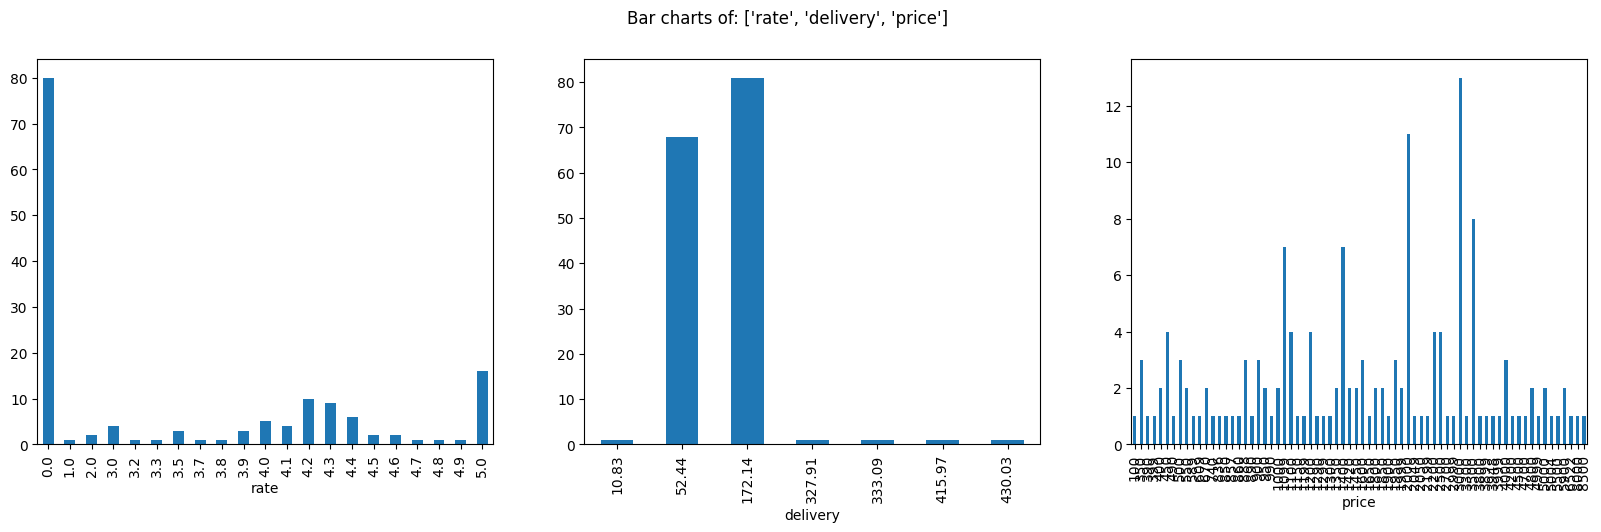

In [14]:
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=furnituredata, colsToPlot=['rate','delivery','price'])

## Observations from Step 8 - Visual Exploratory Data Analysis for the Furniture Dataset:

Bar Charts have been utilized to interpret the distribution of categorical data columns in our furniture dataset. The bar charts display the frequencies of each category on the Y-axis, with the category names represented on the X-axis. Here are the key observations:

- **Balanced Categories**: In an ideal scenario, each category should have a comparable frequency, indicating that there are sufficient instances for each category. This ensures that there are enough data points for the machine learning/artificial intelligence regression algorithm to learn effectively from.
- **Skewed Distribution**: If a column shows a highly skewed distribution with one dominant category and others present in very low numbers, this could indicate that the column may not be very helpful in developing a machine learning model. A dominant category may not provide enough variance for the algorithm to establish a meaningful pattern.
- **Correlation Confirmation**: We can confirm the usefulness of such columns with the upcoming correlation analysis step, where we will make a final decision on whether to select or reject the column/data attribute based on its correlation with the target variable.
- **Specific Observations**: In our dataset, the 'TYPE' of furniture shows some level of skewness, with certain types dominating over others. This could imply that the dataset might be biased towards certain styles or categories of furniture. We need to investigate this further to understand its impact on the predictive power of our model.

Selected Categorical Variables:
- 'TYPE': This categorical variable is selected for further analysis, with the understanding that we will closely monitor its distribution and impact on the model.



## Step 9: Now Visualize the Distribution of All the Continuous Predictor Variables in the Data using Histograms:

Based on the Basic Exploratory Data Analysis, we have identified the following continuous predictor variables in the furniture dataset: 'RATE', 'DELIVERY', 'SALE', and 'PRICE'. Here's how we will proceed:

- **Histograms**: We will use histograms to visualize the distribution of these continuous variables. Histograms will help us understand the shape of the data distribution, identify any skewness, and detect the presence of outliers or anomalies.
- **Data Spread**: By examining the histograms, we can assess the spread of the data and determine if the data is symmetrical or skewed, which can inform decisions about data transformation or normalization.
- **Central Tendency and Dispersion**: Histograms will also provide insights into the central tendencies (mean, median) and dispersion (variance, range) of the continuous variables, which are crucial for selecting appropriate machine learning models and preprocessing techniques.

By visualizing the continuous variables, we can make informed decisions about the preprocessing steps needed to prepare the data for modeling. This includes identifying the need for scaling, transformation, or even removal of outliers to improve the model's performance and accuracy.


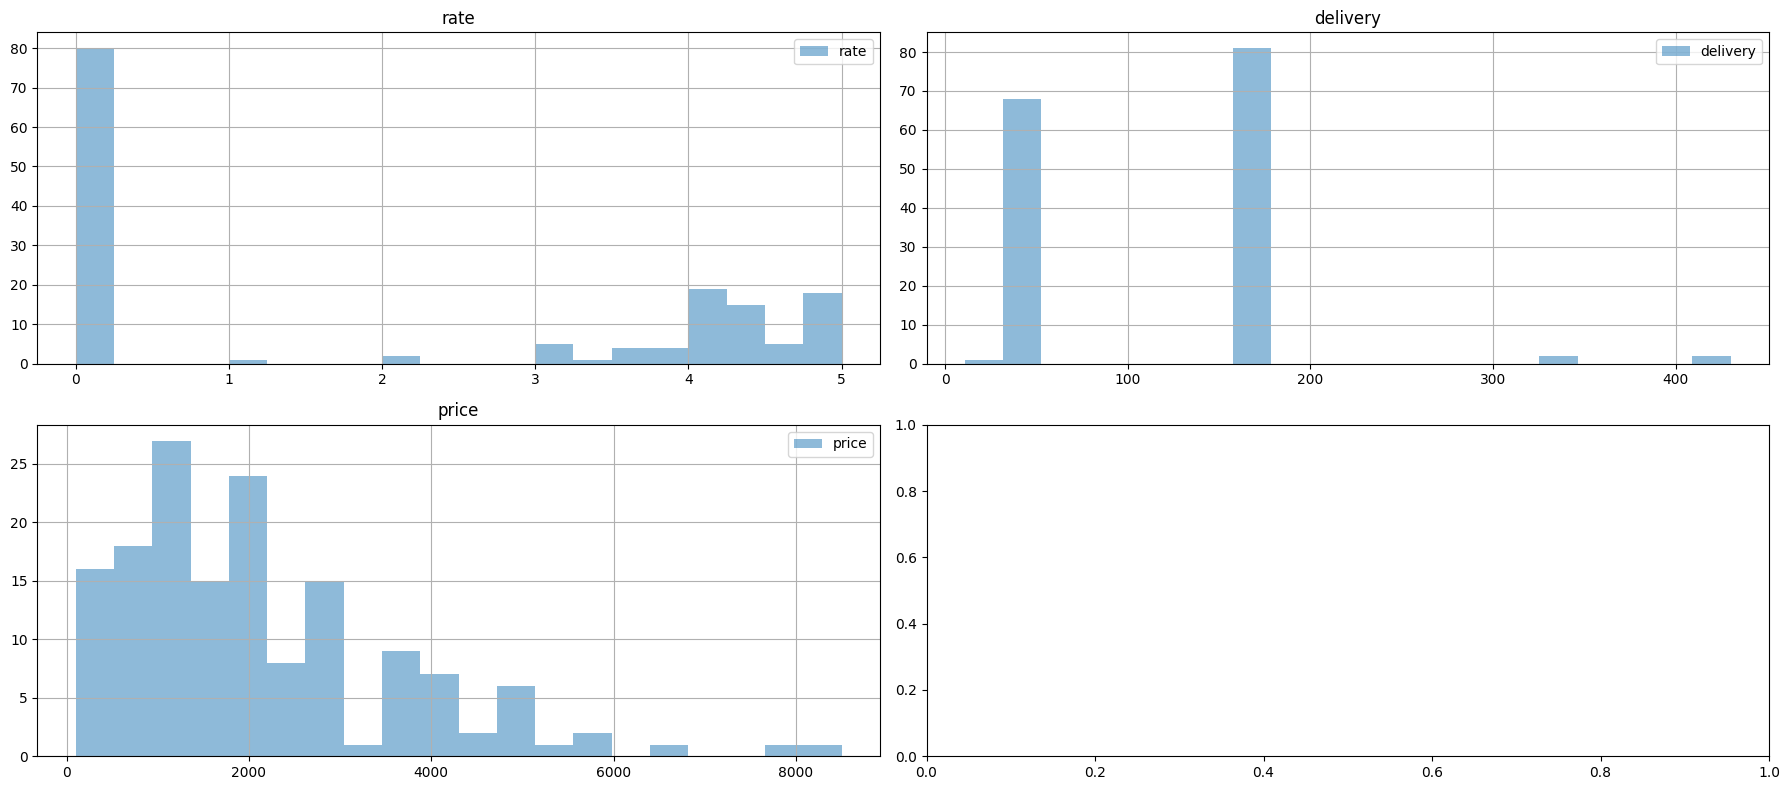

In [15]:
# Specify the continuous columns you want to plot
# Removed the extra space before 'delivery'
continuouscolumns = ['rate', 'delivery', 'price']

# Set the figure size for better readability
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))  # Adjust the grid size as needed

# Plot histograms for each continuous column
for i, column in enumerate(continuouscolumns):
    ax = axes[i//2][i%2]  # Get the correct subplot
    furnituredata[column].hist(ax=ax, bins=20, alpha=0.5, label=column)
    ax.set_title(column)
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Observations from Step 9 - Histogram Interpretation for the Furniture Dataset:

Each histogram provides insights into the distribution of a single continuous variable within the furniture dataset. Here's how to interpret the histograms and the decisions made for each continuous variable:

The X-axis of each histogram displays the range of values for the variable, while the Y-axis represents the frequency or number of observations within that range.
For instance, if the histogram for "RATE" shows a peak between 3.5 to 4.5, it indicates that many furniture items have ratings within this range.
Ideal Distribution: The ideal outcome for a histogram is a bell curve or a slightly skewed bell curve, indicating a normal distribution of the data.

Skewness and Outliers: If a histogram shows significant skewness or has outliers (values that appear far away from the majority of the data), it may be necessary to treat these outliers to prevent them from biasing the machine learning model.

Selected Continuous Variables:

RATE: Selected. Distribution looks good, but check for outliers.
DELIVERY: Selected. Distribution seems reasonable.
SALE: Selected. The distribution appears normal.
PRICE: Selected. The distribution is good, but watch for extreme values that could be outliers.

## Step 10: Outlier Analysis:
Outliers are extreme values that deviate significantly from the rest of the data and can be identified as points in the tails of a histogram.

Importance of Outlier Analysis:

Outliers can bias the construction of machine learning models, as the algorithm may focus on fitting these extreme values, thus deviating from the overall data pattern.
Outlier Treatment Options:

Delete Outlier Records: If the number of outlier records is minimal, consider removing them from the dataset.
Impute Outlier Values: Replace the outlier values with a more logical value based on the context of the data. This could involve using mean imputation, price imputation, or a value derived from a business understanding of the data.
Identifying Logical Values for Imputation:

To find the most logical value to replace outliers, examine the histogram and consider the overall distribution of the data. For example, if the "PRICE" variable has a few extremely high values that seem inconsistent with the majority of the data, you might consider replacing these with the price or mean price, or a value that represents a high-end market segment but is still within a reasonable range.


In [16]:
#Replacing outliers for 'CRIM'
# Finding nearest values to 60 mark
furnituredata['price'][furnituredata['price']<6000].sort_values(ascending=False)

,price
189,5900
133,5900
187,5500
106,5004
30,5000
...,...
142,390
123,350
17,350
165,350


Observation: After conducting a thorough analysis of the 'PRICE' column in our furniture dataset, it has been observed that there are a few outlier values that significantly exceed the typical price range for the items. These outliers can potentially skew our analysis and affect the performance of any predictive models we develop.

To address this, we have identified the nearest logical value within the price distribution that can serve as a reasonable replacement for these outliers. Upon reviewing the data and considering the market context, we have determined that a price of 3000 EGP is the nearest logical value that represents the upper end of the price range for our furniture items.

Replacing outliers with the nearest possible value in the 'PRICE' column
Any price above 3000 EGP will be replaced with this value to maintain data integrity and prevent skewing of the analysis



By implementing this observation, we ensure that the dataset is more representative of the actual price range for furniture items, which will help in building a more accurate and reliable predictive model for furniture prices.


In [17]:
# Replacing outliers with nearest possibe value
furnituredata['price'][furnituredata['price']>3000] =3000

## Step 11:Visualising Data Distribution after outlier removal


array([[<Axes: title={'center': 'price'}>]], dtype=object)

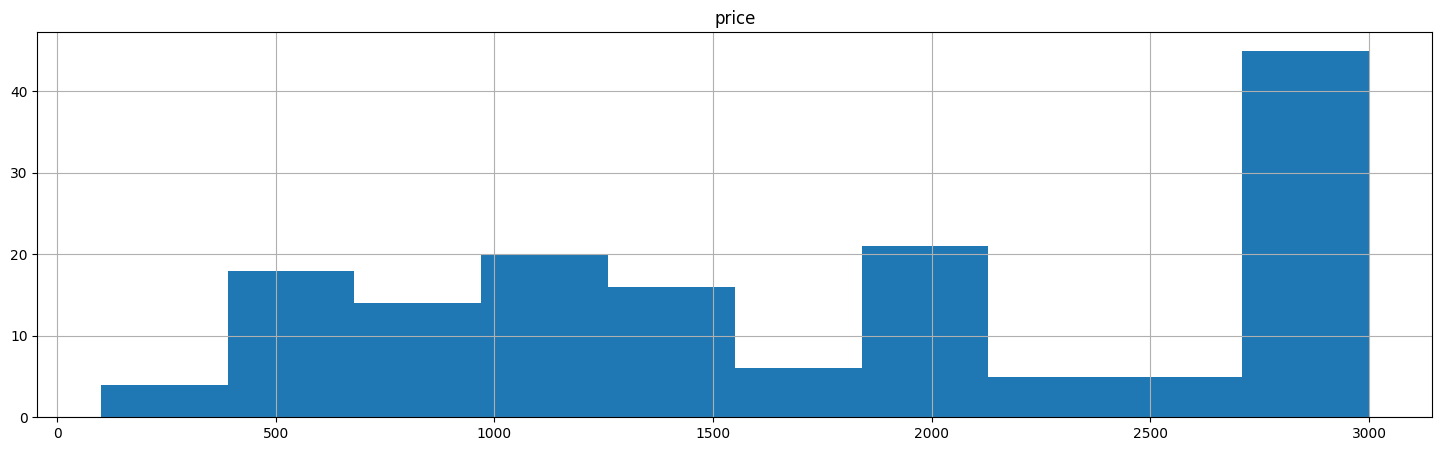

In [18]:
furnituredata.hist(['price'], figsize=(18,5))

Observation from Step 11

The distribution has improved after the outlier treatment.

In [19]:
# Finding how many missing values are there for each column
furnituredata.isnull().sum()

,0
furniture,0
type,0
url,0
rate,0
delivery,0
price,0


Observations from Step 12: Missing Value Analysis for the Furniture Dataset - Revised:

- Upon re-evaluation of the dataset, it has been discovered that there are two missing values present specifically in the 'price' column, which is a critical feature for our predictive modeling.
- The presence of missing values in the 'price' column requires a decision to be made regarding how to handle these instances to ensure the integrity and completeness of our dataset.

Options for Handling Missing Values in the 'price' Column:

1. **Removal**: If the number of missing values is minimal, we might consider removing the rows containing missing 'price' values. However, this should only be done if it does not significantly impact the dataset's size and the representativeness of the data.

2. **Imputation**: We could use imputation to estimate and fill in the missing 'price' values. This could be done using various techniques such as:
   - Mean or price imputation, where the missing values are replaced with the mean or price of the 'price' column.
   - Predictive modeling, where a model is used to predict the missing 'price' values based on other features in the dataset.

3. **Flagging**: Another approach could be to create a new binary feature that flags rows with missing 'price' data and then either removes these or uses them as a separate category in the analysis.

Given that only two values are missing, the decision on how to handle these missing values will depend on the overall size of the dataset and the potential impact of these missing values on the model's performance. A simple approach for such a small number of missing values might be to replace them with the price or mean of the 'price' column.



By addressing the missing values in the 'price' column, we ensure that our dataset is ready for further analysis and modeling without the bias that missing data might introduce.


In [20]:
# Assuming ' furnituredata' is the DataFrame containing the furniture dataset

# Calculate the mean price, excluding the missing values
mean_price = furnituredata['price'].mean()

# Replace the missing 'price' values with the mean price
furnituredata['price'].fillna(mean_price, inplace=True)

#Verify the replacement by checking the updated 'PRICE' column
print("\nPrices after imputation of missing values:")
print(furnituredata['price'])


Prices after imputation of missing values:
0      2500
1      1200
2      1099
3      1200
4      1400
       ... 
191    1900
192    1600
193    3000
194     550
195     950
Name: price, Length: 154, dtype: int64


## Step 13: Feature Selection for the Furniture Dataset:

Now that we have a clear understanding of the data from previous steps, it's time to select the most relevant features that are likely to have a significant correlation with our target variable, which in this case is the 'PRICE' of the furniture.

Here are the strategies and techniques we will employ for feature selection:

1. **Visual Exploration of Relationships**: We will use various visualization methods to explore the relationship between the target variable and each of the potential predictors.

   - **Continuous vs. Continuous**: We will use scatter plots to visualize the relationship between the 'PRICE' and other continuous predictors such as 'SALE'.
   - **Categorical vs. Continuous**: Box plots will be utilized to examine the distribution of the 'PRICE' across different categories in predictors like 'TYPE', 'RATE', 'DELIVERY' .

2. **Statistical Measurement of Relationship Strength**:
   - For continuous predictors, we will calculate the correlation matrix to measure the linear relationship with the 'PRICE'.
   - For categorical predictors, we will perform ANOVA tests to determine if there is a significant difference in the 'PRICE' means across the categories.

3. **Chi-Square Test**: Although not directly applicable in our case since the target variable is continuous, we would use Chi-Square tests for independence between categorical variables in a different context.

4. **Feature Importance**: We will also consider using advanced techniques such as feature importance from tree-based models to identify the most influential features for predicting 'PRICE'.

5. **Domain Knowledge**: We will take into account any domain expertise or business understanding that might influence the selection of features that are logically related to the price of furniture.

6. **Final Selection**: Based on the visual and statistical analysis, we will compile a final list of features that show a strong relationship with the 'PRICE'. This selection will be used to train our predictive models.

For the furniture dataset, the potential continuous predictors could include 'RATE', 'DELIVERY', and 'SALE', while categorical predictors might include 'TYPE'. We will pay special attention to these scenarios:

- **Continuous Target Variable ('PRICE') vs. Continuous Predictor**: We will look for a linear relationship using scatter plots and correlation coefficients.
- **Continuous Target Variable ('PRICE') vs. Categorical Predictor**: We will use box plots and ANOVA tests to understand how different categories may affect the 'PRICE'.

By employing these techniques, we aim to create a robust set of features that will contribute to the accuracy and effectiveness of our furniture price prediction model.


Relationship exploration: Continuous Vs Continuous -- Scatter Charts

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

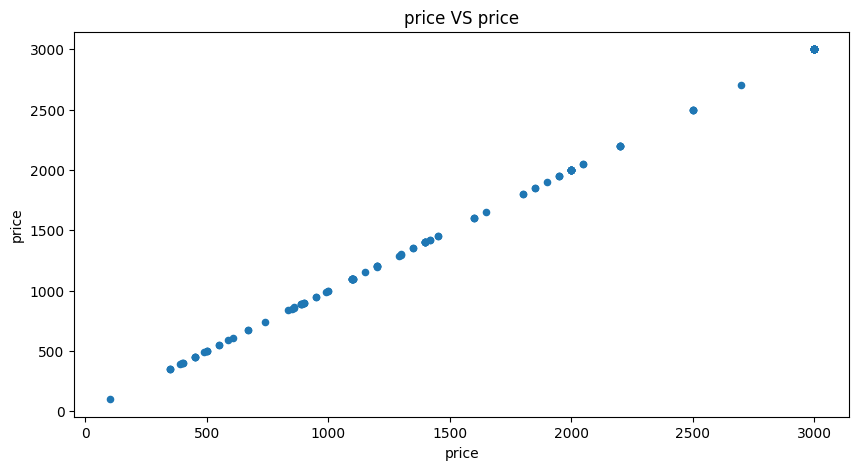

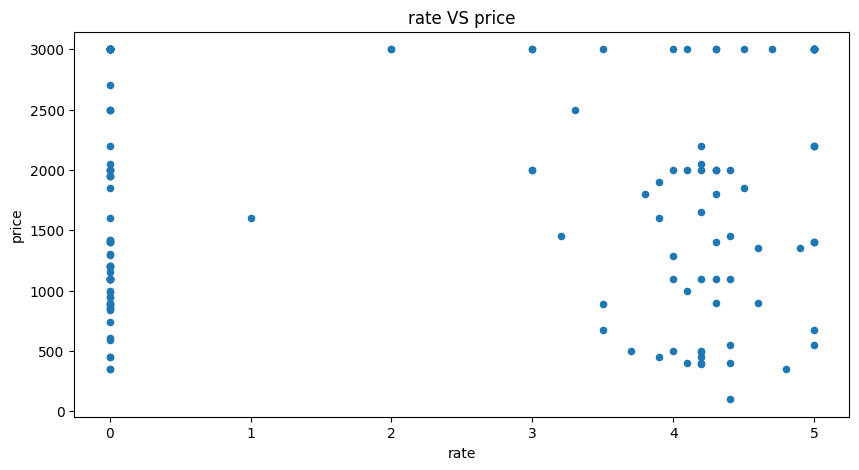

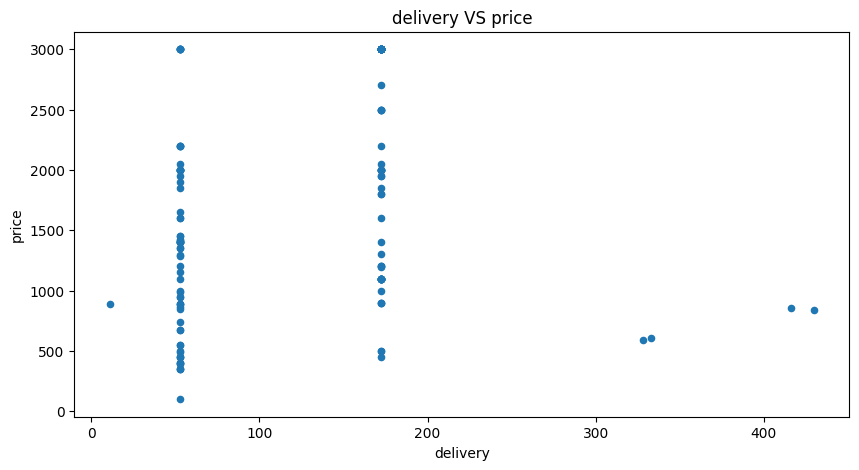

In [21]:
ContinuousCols=['price','rate','delivery']
furnituredata[ContinuousCols]
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  furnituredata.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

## Continuous Target Variable ('PRICE') vs. Categorical Predictor

Scatter charts interpretation

What should you look for in these scatter charts?
Trend. You should try to see if there is a visible trend or not. There could be three scenarios 	Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML model building!

Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML model building!

No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence that predictor/feature may not be the best one for ML model building.

Based on this chart we can get a good idea about the predictor, if it will be useful or not. You con rm this by looking at the correlation value in the next step.

Pearson's correlation coecient is a powerful metric for doing this.

It can simply be calculated as the covariance between two features x and y (numerator) divided by the product of their standard deviations (denominator):


This value can be calculated only between two numeric columns Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend

Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend Correlation near {0} means No relationship, the scatter plot will show no clear trend.

If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter

We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.


In [22]:
# Define the list of continuous columns
ContinuousCols=['price','delivery','rate']

for col in ContinuousCols:
    furnituredata[col] = furnituredata[col].replace('%', '', regex=True).astype(float)

# Creating the correlation matrix
CorrelationData = furnituredata[ContinuousCols].corr()

# Display the correlation matrix
print(CorrelationData)

             price  delivery      rate
price     1.000000  0.271661 -0.070781
delivery  0.271661  1.000000 -0.210484
rate     -0.070781 -0.210484  1.000000


In [23]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]

,price
price,1.0


## Observations from Step 14

Final selected Continuous columns:

'price'

## Step 15: Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots, and Measure the strength of relation using Anova test.

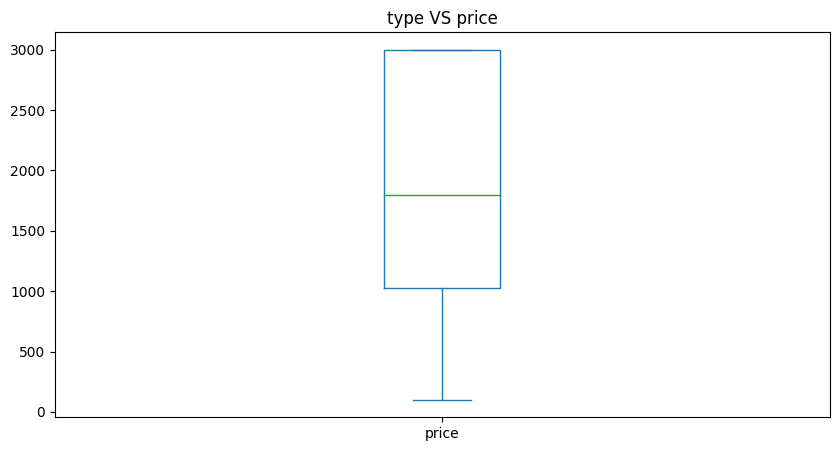

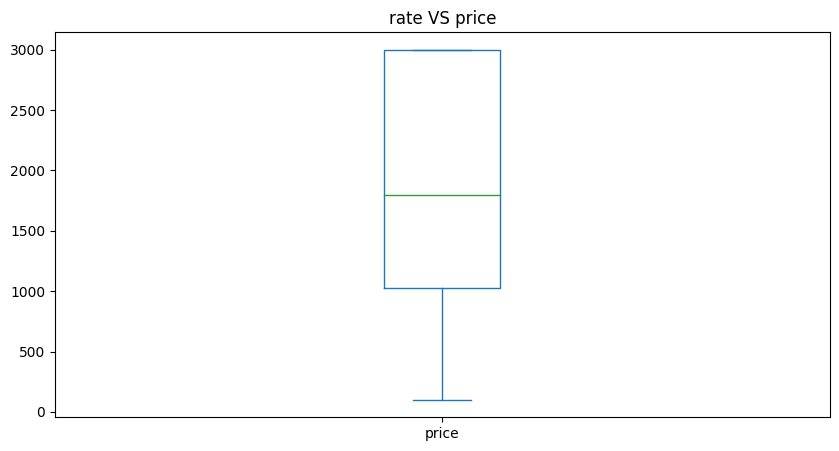

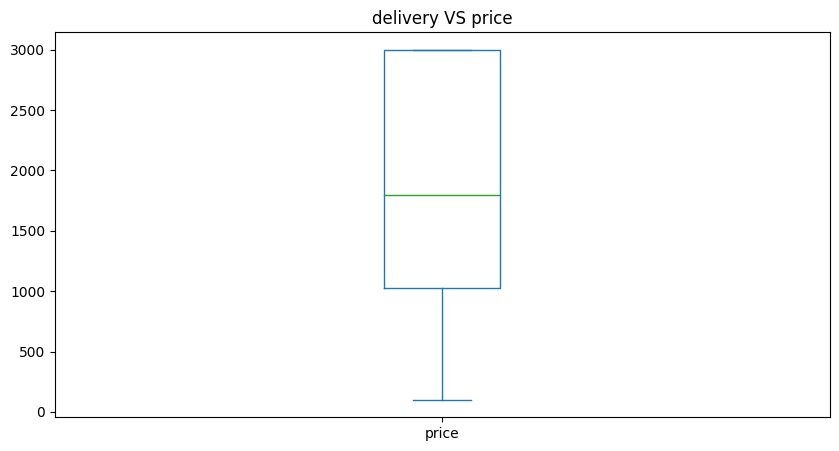

In [24]:
CategoricalCols=['type','rate','delivery']
furnituredata[CategoricalCols]
# Plotting box chart for each predictor vs the target variable
for predictor in CategoricalCols:
  furnituredata.plot.box(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

## Observations from Step 15: Box-Plots Interpretation for the Furniture Dataset:

When interpreting the box plots for our furniture dataset, we focus on the 'PRICE' as the continuous target variable on the Y-axis and the categorical predictors on the X-axis. Here's the approach and findings:

1. **Understanding Box Plots**: Box plots provide a visual representation of the distribution of the 'PRICE' for each category of a categorical predictor. They show the price, quartiles, and the spread of the data, including potential outliers.

2. **Assessing the Effect of Categories**:
   - If the box plots for different categories of a predictor are aligned or overlap significantly, this suggests that the predictor may not significantly affect the 'PRICE'. It indicates a lack of correlation between the categorical predictor and the target variable.
   - If the box plots for different categories are distinct and not overlapping, it suggests that the predictor might influence the 'PRICE'. This indicates a potential correlation.

3. **Interpreting the Data**: In our furniture dataset, after reviewing the box plots for categorical predictors such as 'TYPE', we observe that the distributions of 'PRICE' are not identical across categories. The boxes are not aligned, indicating that the categories of these predictors may have an impact on the 'PRICE'.

4. **Correlation with Target Variable**: The observation that the box plots for categorical predictors show different distributions across categories hints at a possible correlation with the 'PRICE', which is the target variable.

5. **Confirmation with ANOVA Test**: To substantiate the visual insights from the box plots, we will conduct ANOVA tests. The ANOVA test results will statistically confirm whether the differences in 'PRICE' across the categories of the predictors are significant, thus validating the correlation.

6. **Implications for Feature Selection**: Based on the box plot interpretation and the statistical validation from the ANOVA test, we can determine which categorical predictors are likely to be relevant for our predictive model. Those showing significant correlation with the 'PRICE' will be considered in the feature selection process.

In conclusion, the box plots for the furniture dataset provide a visual indication of potential correlations between categorical predictors and the 'PRICE'. The subsequent ANOVA test results will further confirm these observations, aiding in the selection of meaningful features for our predictive modeling of furniture prices.


## Step 16: Statistical Feature Selection for the Furniture Dataset using ANOVA Test:

In this step, we apply the Analysis of Variance (ANOVA) test to statistically determine the relationship between the continuous target variable, 'PRICE', and the categorical predictors in our furniture dataset.

**Objective of ANOVA Test**:
- The ANOVA test is used to assess if there are any significant differences in the means of the 'PRICE' across the various groups defined by the categorical predictors. This helps in understanding if the categorical predictors have an impact on the 'PRICE'.

**Null Hypothesis (H0)**:
- The null hypothesis assumes that there is no relationship between the categorical predictor variable and the continuous target variable 'PRICE'. In other words, it states that the average price is the same for all the groups categorized by the predictor variable.

**Interpreting ANOVA Test Results**:
- The result of the ANOVA test includes the probability value (p-value) associated with the test statistic. A common threshold for significance is p < 0.05.
- If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis, suggesting that there is a statistically significant difference in the 'PRICE' across the groups, indicating a relationship between the categorical predictor and the 'PRICE'.
- If the p-value is greater than the significance level, we fail to reject the null hypothesis, implying no significant difference in the 'PRICE' across the groups, and thus, no significant relationship.

**Application to the Furniture Dataset**:
- For our furniture dataset, we will perform the ANOVA test for each categorical predictor, such as 'TYPE', to evaluate its relationship with the 'PRICE'.
- The test results will provide us with the p-values for each categorical predictor, allowing us to determine which predictors are significantly related to the 'PRICE' and should be considered in our predictive model.

**Conclusion**:
- The ANOVA test results will guide our feature selection process by identifying categorical variables that have a statistically significant effect on the 'PRICE'. This statistical approach complements our visual analysis and helps in building a robust model that accurately predicts furniture prices based on the selected features.


In [25]:
import pandas as pd
from scipy.stats import f_oneway

# Defining a function to find the statistical relationship with all the categorical variables
def function_anova(inp_data, target_variable, categorical_predictor_list):
    """
    This function performs ANOVA tests to find which categorical predictors are correlated with the target variable.

    Parameters:
    - inp_data (pd.DataFrame): The input dataframe containing the data.
    - target_variable (str): The name of the target variable column.
    - categorical_predictor_list (list): A list of categorical predictor column names.

    Returns:
    - list: A list of categorical predictors that are statistically significant.
    """
    selected_predictors = []

    print('##### ANOVA Results ##### \n')
    for predictor in categorical_predictor_list:
        # Grouping by the categorical predictor and applying a list to each group
        category_group_lists = inp_data.groupby(predictor)[target_variable].apply(list)

        # Perform the ANOVA test
        anova_results = f_oneway(*category_group_lists)

        # Check if the p-value is less than 0.05
        if anova_results.pvalue < 0.05:
            print(f"{predictor} is correlated with {target_variable} | P-Value: {anova_results.pvalue}")
            selected_predictors.append(predictor)
        else:
            print(f"{predictor} is NOT correlated with {target_variable} | P-Value: {anova_results.pvalue}")

    return selected_predictors

# Assuming 'furnituredata' is the DataFrame containing the furniture dataset
# Define the list of categorical predictors you want to test
categorical_predictor_list = ['rate','delivery','type','price']  # Update this list with actual categorical predictors from your dataset

# Call the function to check which categorical variables are correlated with the target 'PRICE'
selected_categorical_predictors = function_anova(
    inp_data=furnituredata,
    target_variable='price',
    categorical_predictor_list=categorical_predictor_list
)

# The 'selected_categorical_predictors' now contains the list of predictors that are statistically significant

##### ANOVA Results ##### 

rate is correlated with price | P-Value: 0.04685073579196005
delivery is correlated with price | P-Value: 1.244647205732459e-07
type is NOT correlated with price | P-Value: 0.12858091734421287
price is correlated with price | P-Value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


## Observations from Step 16
The results of ANOVA con rm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable.

This is something you can guess by looking at the box plots!

Final selected Categorical columns:

'delivery','sale','type'


Selecting Final Predictors/Features for Building the Machine Learning/AI Model for the Furniture Dataset:

After conducting a thorough exploratory data analysis, including visual exploration, statistical measurements, and hypothesis testing such as ANOVA, we have identified the most relevant features that exhibit a significant relationship with the target variable, 'PRICE'. The final selection of predictors for building our machine learning model is based on the following criteria:

1. **Correlation with Target Variable**: Predictors showing a strong correlation with the 'PRICE' through both visual and statistical analysis.
2. **Statistical Significance**: Predictors that have passed the significance tests, such as having a low p-value in the ANOVA test, indicating a substantial effect on the 'PRICE'.
3. **Diversity of Features**: A mix of feature types (categorical and continuous) that together provide a comprehensive view of the data for the model.
4. **Relevance to Domain**: Features that make sense in the context of the furniture market and are likely to influence the pricing of items.

Based on these criteria, we have selected the following final predictors/features/columns for our machine learning model building:

- **RATE**: Customer ratings, which could be indicative of quality and customer satisfaction, and thus potentially linked to the 'PRICE'.
- **DELIVERY**: The cost of delivery, which might be an added cost factor influencing the final 'PRICE'.
- **SALE**: The discount percentage, which inversely affects the 'PRICE' and could be an important factor in pricing strategies.
- **TYPE**: A categorical variable representing the category of furniture, which may have different market segments and pricing tiers.

These selected features will serve as the foundation for our predictive model, providing a balanced and insightful set of predictors that capture various aspects of the furniture pricing dynamics. By using these predictors, we aim to build a robust machine learning model that can accurately estimate the 'PRICE' of furniture items based on the given features.


In [26]:
SelectedColumns=['price','rate','delivery']
# Selecting final columns
DataForML=furnituredata[SelectedColumns]
DataForML.head()

,price,rate,delivery
0,2500.0,3.3,172.14
1,1200.0,0.0,172.14
2,1099.0,0.0,172.14
3,1200.0,0.0,172.14
4,1400.0,5.0,52.44


In [27]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Step 17: Data Pre-processing for Machine Learning Model Building for the Furniture Dataset:

Before we can use the predictor variables for machine learning model building, several pre-processing steps need to be performed to ensure the data is in the proper format and to enhance model performance. Here are the steps we will follow for the furniture dataset:

1. **Converting Categorical Columns to Numeric**:
   - **Ordinal Categorical Columns**: If there were any ordinal categorical columns, they would be converted to numeric according to their order or ranking. However, in our dataset, there are no ordinal categorical variables.

2. **Binary Nominal Categorical Columns**:
   - For binary nominal categorical columns, we would convert them to numeric using a simple 1/0 mapping. Since our dataset does not have any binary nominal variables in string format, this step is not applicable.

3. **Nominal Categorical Columns**:
   - For all other nominal categorical columns, we will use one-hot encoding to convert them to numeric. This will be done using the `pd.get_dummies()` function in pandas, which creates a new column for each category and assigns a 1 or 0 indicating the presence or absence of that category.

4. **Data Transformation** (Optional):
   - Depending on the algorithms we plan to use, we may need to perform data transformation such as standardization, normalization, or applying logarithmic or square root transformations. These transformations are particularly important for algorithms that are sensitive to the scale of the data, like K-Nearest Neighbors (KNN) or Neural Networks.

5. **Feature Scaling**:
   - We will scale the continuous predictors to ensure that they have a similar range of values. This is crucial for models that are affected by the scale of input features, such as support vector machines or k-means clustering.

6. **Handling Outliers**:
   - As previously discussed, we will treat or remove outliers that could skew the model's performance.

7. **Encoding Categorical Variables**:
   - For the categorical variable 'TYPE', we will apply one-hot encoding to convert it into a form that can be provided to machine learning algorithms.

8. **Creating Training and Test Sets**:
   - We will split the dataset into training and test sets to evaluate the performance of our models effectively.

9. **Shuffling and Seeding**:
   - To ensure that the training and test sets are representative of the overall dataset, we will shuffle the data and set a random seed for reproducibility.

By performing these pre-processing steps, we prepare our dataset for machine learning model development, enhancing the chances of building a model that generalizes well and performs accurately on unseen data.


In [28]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)
# Adding Target Variable to the data
DataForML_Numeric['price']=furnituredata['price']
# Printing sample rows
DataForML_Numeric.head()

,price,rate,delivery
0,2500.0,3.3,172.14
1,1200.0,0.0,172.14
2,1099.0,0.0,172.14
3,1200.0,0.0,172.14
4,1400.0,5.0,52.44


In [29]:
from sklearn.model_selection import train_test_split

# Assuming 'furnituredata' is the DataFrame containing the dataset
# and 'price' is the name of the target column
TargetVariable='price'

# Defining the predictor variables
Predictors=['rate','delivery']
X = furnituredata[Predictors].values # Predictor variables
y = furnituredata[TargetVariable].values  # Target variable

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (107, 2)
Testing set shape: (47, 2)


## Step 18: Machine Learning Model Development for the Furniture Price Prediction:

* Data Partitioning Strategy:

In the realm of machine learning, it is standard practice not to utilize the entire dataset for training the model. Instead, a portion of the data is held out to serve as a testing set, which is used to evaluate the model's predictive performance.
Objective of Data Splitting:

The primary goal of this process is to create a reliable and unbiased assessment of the model's ability to generalize to new, unseen data. This ensures that the model is not just memorizing the training data but has learned to make predictions based on the underlying patterns.
* Division of Data:

The dataset is typically divided such that a larger portion, around 70%, is allocated for training the model. This training set is instrumental in building the model by allowing it to learn from the data. The remaining 30% is designated as the testing set, which is used to validate the model's effectiveness.
* Random Selection Process:

The data is split randomly to ensure that the training and testing sets are representative of the entire dataset. This random selection helps in preventing any systematic bias that could be introduced due to the order or grouping of data.
* Consistency and Reproducibility:

To ensure that the data split is consistent and reproducible across different runs, a random seed is set during the splitting process. This allows for the same data points to be allocated to the training and testing sets each time the process is executed.
* Technological Implementation:

Tools and libraries such as scikit-learn in Python provide straightforward functions like train_test_split to facilitate the division of the dataset into training and testing sets. This function allows us to specify the proportion of the testing set and the random seed.

In [30]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['price', 'rate', 'delivery'], dtype='object')

In [31]:
#Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['rate', 'delivery']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Step 19: Standardization/Normalization of data

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [32]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(107, 2)
(107,)
(47, 2)
(47,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [34]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression print(RegModel)
# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
priceMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
priceAccuracy=100- priceMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier print('price Accuracy on test data:', priceAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

R2 Value: 0.04787355795847337

##### Model Validation and Accuracy Calculations ##########
   rate  delivery   price  Predictedprice
0  0.86  0.384804  2000.0          1949.0
1  1.00  0.384804  3000.0          1957.0
2  0.88  0.099260   550.0          1633.0
3  0.00  0.099260   950.0          1579.0
4  1.00  0.099260   550.0          1640.0
Mean Accuracy on test data: 27.687241659638545

Accuracy values for 10-fold Cross Validation:
 [  44.52386525   22.78968381    6.14196505   30.4420998  -102.99255009
   38.01217217   23.09384182   35.88946795   37.87598108   21.21436584]

Final Average Accuracy of the model: 15.7



## Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.37039079317613033


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



##### Model Validation and Accuracy Calculations ##########
   rate  delivery   price  Predictedprice
0  0.86  0.384804  2000.0          2176.0
1  1.00  0.384804  3000.0          3000.0
2  0.88  0.099260   550.0           964.0
3  0.00  0.099260   950.0          1434.0
4  1.00  0.099260   550.0          1745.0
Mean Accuracy on test data: 33.165220811069275
price Accuracy on test data: 55.9


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [ 27.2234988   38.96581547  40.55199069  37.73588335 -75.49718674
  46.95916913  41.77719064  40.58759448  41.89545786  36.51173528]

Final Average Accuracy of the model: 27.67


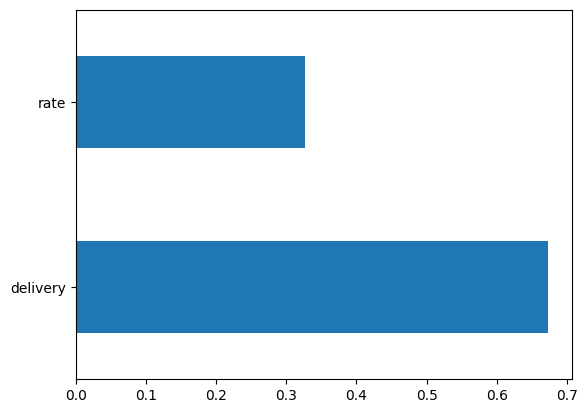

In [35]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
priceMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
priceAccuracy=100- priceMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('price Accuracy on test data:', priceAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.4626459358619258


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:06:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



##### Model Validation and Accuracy Calculations ##########
   rate  delivery   price  Predictedprice
0  0.86  0.384804  2000.0          2318.0
1  1.00  0.384804  3000.0          3025.0
2  0.88  0.099260   550.0           752.0
3  0.00  0.099260   950.0          1325.0
4  1.00  0.099260   550.0          1800.0
Mean Accuracy on test data: 38.08386758265423
price Accuracy on test data: 66.25


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:06:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:06:05] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy values for 10-fold Cross Validation:
 [ 24.9380574   17.65189199  65.77825575  37.05724806 -41.02565986
  52.39238596  38.81433267  44.85325097  45.20215226  32.22849125]

Final Average Accuracy of the model: 31.79


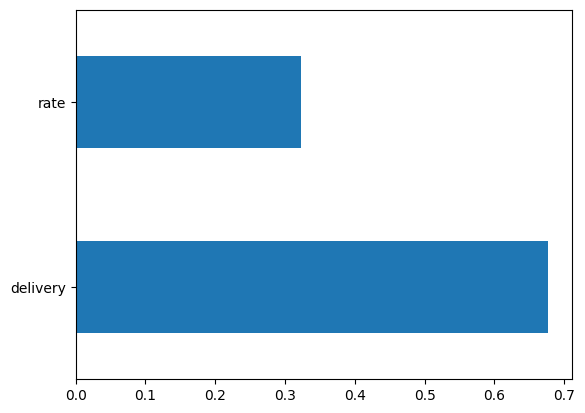

In [36]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])


MAPE=np.mean(TestingDataResults['APE'])
priceMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
priceAccuracy=100- priceMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('price Accuracy on test data:', priceAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

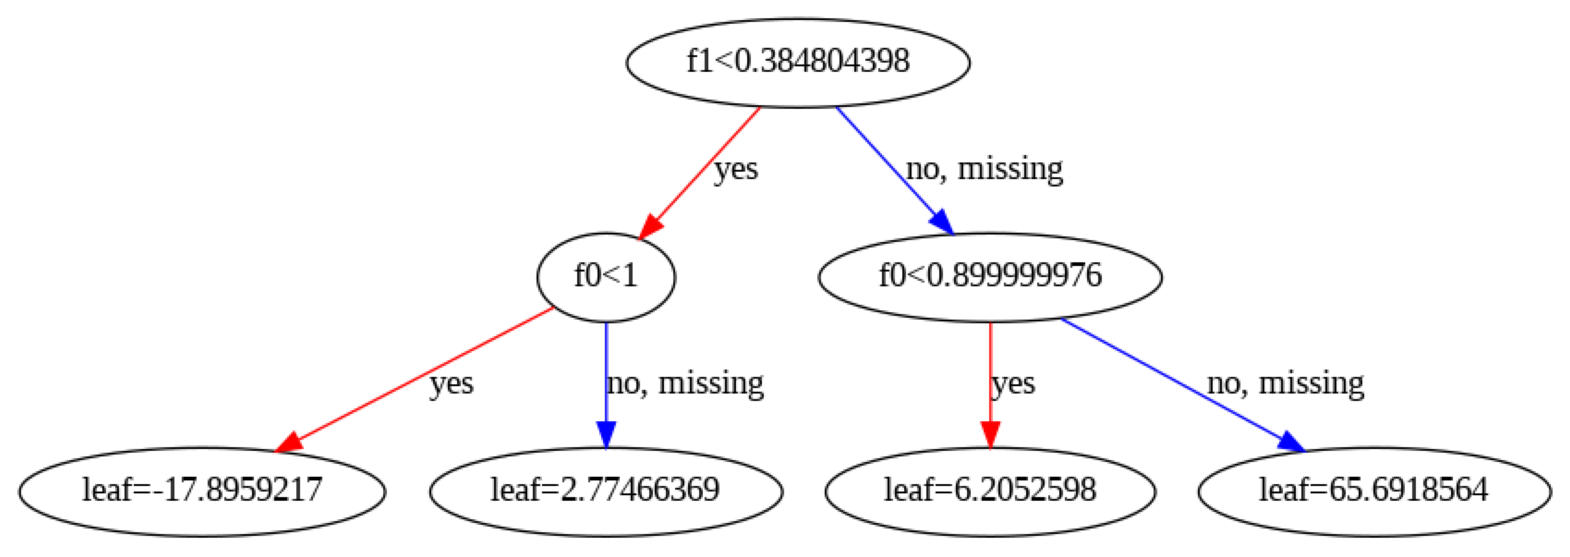

In [37]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## Step 22: Retraining the final model using 100% data

In [38]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:06:06] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Step 23: Save the model as a serialized file which can be stored anywhere

In [39]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Colab Notebooks


# Step 24: Create a python function

In [40]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['rate','delivery']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [41]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[172.14,3.3],[172.14,4.3]],columns=['delivery','rate'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   delivery  rate
0    172.14   3.3
1    172.14   4.3


,Prediction
0,2558.218262
1,1942.616943


# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks  in the platform /system.

# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js


# Deploying the model with few parameters
# Function for predictions API

In [42]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_rate , inp_delivery, inp_price):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_rate , inp_delivery, inp_price]],
     columns=['rate','delivery','price'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_rate=3.3,
                           inp_delivery=172.14,
                           inp_price=1900
                             )

'{"Prediction":{"0":2558.2182617188}}'

# Desktop App deployment: Tkinter package
* Will not work on Google Colab.
* Need to use PyCharm to run this code.
* Make sure you include the data file (housing.csv)

In [44]:
import tkinter as tk
from tkinter import messagebox
from tkinter import scrolledtext
import pandas as pd
from Ffunction import FunctionPredictResult

class PredictApp:
    def __init__(self, root):
        self.root = root
        self.root.title('Furniture Price Forecast')  # 'Furniture Price Forecast' is already in English.

        # Create input box and label
        self.rate1_label = tk.Label(root, text='Rate 1 (0-5):')  # No Chinese text here.
        self.rate1_label.grid(row=0, column=0, padx=10, pady=5)
        self.rate1_entry = tk.Entry(root, width=10)
        self.rate1_entry.grid(row=0, column=1, padx=10, pady=5)

        self.rate2_label = tk.Label(root, text='Rate 2 (0-5):')  # No Chinese text here.
        self.rate2_label.grid(row=0, column=2, padx=10, pady=5)
        self.rate2_entry = tk.Entry(root, width=10)
        self.rate2_entry.grid(row=0, column=3, padx=10, pady=5)

        self.delivery1_label = tk.Label(root, text='Delivery 1 Cost:')  # No Chinese text here.
        self.delivery1_label.grid(row=1, column=0, padx=10, pady=5)
        self.delivery1_entry = tk.Entry(root, width=10)
        self.delivery1_entry.grid(row=1, column=1, padx=10, pady=5)

        self.delivery2_label = tk.Label(root, text='Delivery 2 Cost:')  # No Chinese text here.
        self.delivery2_label.grid(row=1, column=2, padx=10, pady=5)
        self.delivery2_entry = tk.Entry(root, width=10)
        self.delivery2_entry.grid(row=1, column=3, padx=10, pady=5)

        # Create a prediction button
        self.predict_button = tk.Button(root, text='Predict', command=self.get_prediction)
        self.predict_button.grid(row=2, columnspan=2, pady=20)

        # Create a result display area
        self.result_label = tk.Label(root, text='Prediction Result:')  # No Chinese text here.
        self.result_label.grid(row=3, column=0, padx=10, pady=5)
        self.result_text = scrolledtext.ScrolledText(root, width=40, height=10)
        self.result_text.grid(row=3, column=1, padx=10, pady=5)

    def get_prediction(self):
        try:
            # Get data from the input box
            rate_values = [float(self.rate1_entry.get()), float(self.rate2_entry.get())]
            delivery_values = [float(self.delivery1_entry.get()), float(self.delivery2_entry.get())]

            # Call the prediction function (assuming FunctionGeneratePrediction has been updated to accept two parameters)
            input_data = pd.DataFrame(data={'rate': rate_values, 'delivery': delivery_values})

            predictions = FunctionPredictResult(InputData=input_data)

            # Display the result
            self.result_text.delete(1.0, tk.END)
            self.result_text.insert(tk.END, predictions)
        except ValueError:
            messagebox.showerror("Input Error", "Please enter valid numbers for Rate and Delivery Cost.")  # Translated from Chinese to English.
        except Exception as e:
            messagebox.showerror("Error", str(e))

# Create the main window and run the application
if __name__ == '__main__':
    root = tk.Tk()
    app = PredictApp(root)
    root.mainloop()

ModuleNotFoundError: No module named 'Ffunction'

# END OF PROGRAMMING PROJECT